# PCA Analysis of Hourly Mean Voltages

In [47]:
import pandas as pd
import os
os.chdir("/home/admin123/timeseries")
fp = "ln_hpc.txt"
df = pd.read_csv(fp, sep = ";")
req_cols = ["Date", "Time", "Voltage"]
df = df[req_cols]
df["Timestamp"] = df["Date"] + " " + df["Time"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"],format="%d/%m/%Y %H:%M:%S")
req_cols = ["Voltage", "Timestamp"]
df = df[req_cols]


## Implementation Note:
We need to remove the values of the voltage encoded as "?" because we need voltage to be a numeric quantity for aggregation in hourly mean voltages

In [48]:

df["Voltage"] = df[- (df["Voltage"] == "?")]
df["Voltage"] = df["Voltage"].astype('float')
df = df.set_index("Timestamp")


In [95]:
hourly_voltage = df.groupby(pd.Grouper(freq='H')).mean()



## Implementation Node:
Note that problematic hourly voltage values exist - Nan

In [96]:
df_prh = hourly_voltage[hourly_voltage["Voltage"].isnull()]
df_prh.head()

,Voltage
Timestamp,
2007-04-28 01:00:00,NaN
2007-04-28 02:00:00,NaN
2007-04-28 03:00:00,NaN
2007-04-28 04:00:00,NaN
2007-04-28 05:00:00,NaN


## Observation
Let us determine the number problematic data collection days in the data 

In [97]:
df_prh.loc[:,"Timestamp"] = df_prh.index.values
num_problem_days = len(df_prh["Timestamp"].dt.date.unique())

In [98]:
num_problem_days

23

## Observation
Number of problematic data records, 23 is much less than the number of probalematic days with minute data samples (82).

In [99]:
import numpy as np
from math import ceil
num_rows = int(ceil(hourly_voltage.shape[0]/24.0))
num_cols = 24


In [100]:
num_rows*num_cols - hourly_voltage.shape[0]

19

In [101]:
type(hourly_voltage.index.hour)

pandas.core.indexes.numeric.Int64Index

In [102]:
hourly_voltage["Hour"]= hourly_voltage.index.hour


In [103]:
first_date = hourly_voltage.index.date[0]
last_date = hourly_voltage.index.date[hourly_voltage.shape[0] - 1]

In [109]:
hourly_voltage = hourly_voltage.loc[~(hourly_voltage.index.date == first_date)]
hourly_voltage = hourly_voltage.loc[~(hourly_voltage.index.date == last_date)]
hourly_voltage.shape

(34560, 2)

In [111]:
num_dates = len(np.unique(hourly_voltage.index.date))

In [115]:
hourly_voltage.head()

,Voltage,Hour
Timestamp,,
2006-12-17 00:00:00,240.961833,0
2006-12-17 01:00:00,240.448333,1
2006-12-17 02:00:00,245.818667,2
2006-12-17 03:00:00,244.513500,3
2006-12-17 04:00:00,243.855500,4


In [116]:
data = np.reshape(hourly_voltage["Voltage"].values, (num_dates, 24), order = 'C')


In [136]:
col = [str(i) + ":00" for i in range(24)]

In [137]:
df_h = pd.DataFrame(data)

In [138]:
df_h.columns = col

In [139]:
df_h = df_h.set_index(np.unique(hourly_voltage.index.date))

In [140]:
df_h.head()

,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
2006-12-17,240.961833,240.448333,245.818667,244.513500,243.855500,243.710167,244.141500,241.845667,241.311500,238.847833,...,244.045667,240.480833,236.781833,234.229833,234.372333,233.195667,236.426500,239.104167,242.192333,245.734000
2006-12-18,244.607500,243.519333,246.891000,245.731833,245.507000,245.253167,245.704333,240.962333,237.880333,237.404667,...,242.196500,242.423500,242.380667,238.729167,236.668500,235.329167,234.524333,237.590833,240.211500,242.659333
2006-12-19,242.071167,241.808333,245.779500,244.463167,244.186500,243.075833,242.029667,239.426167,236.146333,239.572333,...,246.945833,241.740667,242.714333,238.606667,237.640500,241.080000,241.328167,240.870000,242.679333,246.627167
2006-12-20,245.811333,243.805333,245.567500,246.150833,246.433667,244.795500,244.074000,243.315000,239.792333,243.122833,...,244.034500,245.719167,244.113500,242.920667,239.240667,236.739833,236.345167,235.992333,238.860500,242.391167
2006-12-21,243.425833,243.698167,243.653667,244.567167,244.740167,243.949500,244.850500,241.293667,239.494500,238.477667,...,243.319500,242.906333,239.906333,235.018333,233.894333,235.000500,234.500333,238.312167,242.866500,245.350333


In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 24)
df_h.shape

(1440, 24)

In [143]:
df_h = df_h.dropna()

In [144]:
df_h.shape

(1417, 24)

In [145]:
pca.fit(df_h.values)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [146]:
print(pca.explained_variance_ratio_)

[0.59787303 0.12469354 0.05157811 0.04675496 0.02923138 0.02405322
 0.02110359 0.01394118 0.01312797 0.01171881 0.00906737 0.00804342
 0.00640253 0.00631976 0.0053605  0.00486446 0.0047924  0.00425005
 0.00391179 0.00361004 0.00348434 0.00290008 0.00189955 0.00101794]


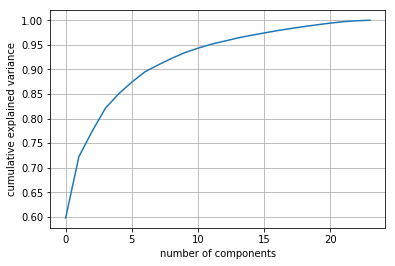

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

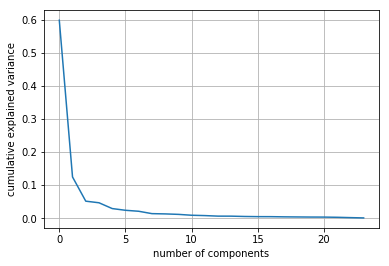

In [148]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()